# **СВОДНЫЙ ПРОЕКТ 2 : МОДЕЛЬ МАШИННОГО ОБУЧЕНИЯ ДЛЯ ОЧИСТКИ ЗОЛОТОСОДЕРЖАЩЕЙ РУДЫ**

## Подготовка данных

### Импорт и изучение файлов

1.1. Откройте файлы и изучите их.

**Импорт библиотек и настройки**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

mpl.style.use('default') 
pd.set_option('display.max_rows', 500) # показывает все строки, если количество строк в выводе не больше 500.
pd.set_option('display.max_colwidth', 20) # показывает все строки, если количество строк в выводе не больше 500.
pd.set_option('display.max_columns', 100) # показывает все строки, если количество строк в выводе не больше 500.
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
try:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv') # путь к данным для сетевой версии
except: 
    data_full = pd.read_csv('gold_recovery_full_new.csv')  # путь к данным для локальной версии

data_full.shape

(19439, 87)

In [3]:
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv') # путь к данным для сетевой версии
except: 
    data_train = pd.read_csv('gold_recovery_train_new.csv')  # путь к данным для локальной версии

data_train.shape

(14149, 87)

In [4]:
try:
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv') # путь к данным для сетевой версии
except: 
    data_test = pd.read_csv('gold_recovery_test_new.csv')  # путь к данным для локальной версии

data_test.shape

(5290, 53)

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
data_full.set_index('date', inplace=True)
data_full.head().T

date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00
final.output.concentrate_ag,6.06,6.03,6.06,6.05,6.15
final.output.concentrate_pb,9.89,9.97,10.21,9.98,10.14
final.output.concentrate_sol,5.51,5.26,5.38,4.86,4.94
final.output.concentrate_au,42.19,42.70,42.66,42.69,42.77
final.output.recovery,70.54,69.27,68.12,68.35,66.93
final.output.tail_ag,10.41,10.46,10.51,10.42,10.36
final.output.tail_pb,0.90,0.93,0.95,0.88,0.79
final.output.tail_sol,16.90,16.63,16.21,16.53,16.53
final.output.tail_au,2.14,2.22,2.26,2.15,2.06
primary_cleaner.input.sulfate,127.09,125.63,123.82,122.27,117.99


### Проверка корректности расчета recovery

**Функция расчета recovery**

$Recovery = \frac{C \times (F-T)}{F \times (C-T)} \times 100\% $

где:
- C — доля золота в концентрате после флотации/очистки; `output_au_share`
- F — доля золота в сырье/концентрате до флотации/очистки; `input_au_share`
- T — доля золота в отвальных хвостах после флотации/очистки. `waste_au_share`

In [7]:
# функция расчета Recovery
def get_recovery(concentrate_au_share, input_au_share, tail_au_share):
    recovery = (
        (concentrate_au_share * (input_au_share - tail_au_share)) 
        / 
        (input_au_share * (concentrate_au_share - tail_au_share)) 
        * 100 )
    return recovery

In [8]:
# вычисляем recovery для процесса флотации
recovery_calculated = data_train.apply(
    lambda x: get_recovery(x['rougher.output.concentrate_au'], x['rougher.input.feed_au'], x['rougher.output.tail_au']), axis=1)

#print(recovery_calculated.head(), '\n')
#print(data_train['rougher.output.recovery'].head(), '\n')

# сравниваем результаты вычислений с rougher.output.recovery
print('MAE для расчетного значения recovery и данных в поле rougher.output.recovery: ' ,
      mean_absolute_error(recovery_calculated, data_train['rougher.output.recovery']))

MAE для расчетного значения recovery и данных в поле rougher.output.recovery:  9.73512347450521e-15


**Промежуточные итоги**

Для расчетного recovery процесса флотации и поля rougher.output.recovery из обучающей выборки значение средней абсолютной ошибки MAE почти нулевое. Это значит, что расчетные по правильной формуле значения и значения в выборке совпадают. В свою очередь это значит что **данные в исходных выборках достоверны**, по ним можно построить расчетную модель и прогнозировать выход золота.

### Анализ признаков, отсутствующих в тестовой выбоке

In [9]:
# выгрузим названия колонок в отдельные DataFrame
left = pd.DataFrame(data_train.columns, columns = ['columns']) 
left['data_train']=True
right = pd.DataFrame(data_test.columns, columns = ['columns']) 
right['data_test']=True

# сведем в одну таблицу
display(pd.merge(left, right, on='columns', how='outer').fillna('-').set_index('columns'))

# признаки, отсутствующие в data_train
train_missed_columns = data_train.loc[:,~data_train.columns.isin(data_test.columns)].columns

# признаки, отсутствующие в data_train
train_common_columns = data_train.loc[:,data_train.columns.isin(data_test.columns)].columns
#print(train_common_columns)

,data_train,data_test
columns,,
date,True,True
final.output.concentrate_ag,True,-
final.output.concentrate_pb,True,-
final.output.concentrate_sol,True,-
final.output.concentrate_au,True,-
final.output.recovery,True,-
final.output.tail_ag,True,-
final.output.tail_pb,True,-
final.output.tail_sol,True,-


**Промежуточные выводы**

**В тестовой выборке есть только данные по параметрам входящего в процессы материала и текущего статуса процесса**. Отсутствуют признаки с выходными значениями процесса - выход золота и прочих веществ после процессов флотации и очистки. Также отсутствуют скалькулированные признаки.

Отсутствующие признаки по этапам процесса:

**`rougher`** 
- Параметры полученного концентрата : rougher.output.concentrate_ag, rougher.output.concentrate_pb, rougher.output.concentrate_sol, rougher.output.concentrate_au, 
- Параметры отвальных хвостов : rougher.output.tail_ag, rougher.output.tail_pb, rougher.output.tail_sol, rougher.output.tail_au
- Значение Recovery : rougher.output.recovery
- Расчетные параметры процесса : rougher.calculation.sulfate_to_au_concentrate, rougher.calculation.floatbank10_sulfate_to_au_feed, rougher.calculation.floatbank11_sulfate_to_au_feed, rougher.calculation.au_pb_ratio

**`primary_cleaner`**
- Параметры полученного концентрата : primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_sol, primary_cleaner.output.concentrate_au
- Параметры отвальных хвостов : primary_cleaner.output.tail_ag, primary_cleaner.output.tail_pb, primary_cleaner.output.tail_sol, primary_cleaner.output.tail_au

**`secondary_cleaner`**
- Параметры полученного концентрата : secondary_cleaner.output.tail_ag, secondary_cleaner.output.tail_pb, secondary_cleaner.output.tail_sol, secondary_cleaner.output.tail_au

**`final`**
- Параметры полученного концентрата : final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol ,final.output.concentrate_au
- Параметры отвальных хвостов : final.output.tail_ag, final.output.tail_pb, final.output.tail_sol, final.output.tail_au
- Значение Recovery : final.output.recovery
 
---

### Предобработка данных

1.4. Проведите предобработку данных.

**Заполнение пропусков**

Для последующего использования данных в моделях машинного обучения, необходимо удалить пропуски из используемых полей.
В предыдущих шагах мы определили наименования колонок, общих для обучающей и тестовой выборок, и сохранили их в списке `train_common_columns`.

In [10]:
print('Количество строк в data_train до удаления пропусков:', len(data_train))
display(
 pd.concat([
     data_train[train_common_columns].isna().sum(), 
     data_train[train_common_columns].isna().mean()*100
 ],axis=1).rename(columns=({0:'empties', 1:'empties%' }))
)

# удалим пропуска в требуемых колонках
data_train.dropna(subset=train_common_columns, inplace=True)

print('Количество строк в data_train после удаления пропусков:', len(data_train))

Количество строк в data_train до удаления пропусков: 14149


,empties,empties%
date,0,0.00
primary_cleaner.input.sulfate,20,0.14
primary_cleaner.input.depressant,32,0.23
primary_cleaner.input.feed_size,0,0.00
primary_cleaner.input.xanthate,100,0.71
primary_cleaner.state.floatbank8_a_air,4,0.03
primary_cleaner.state.floatbank8_a_level,1,0.01
primary_cleaner.state.floatbank8_b_air,4,0.03
primary_cleaner.state.floatbank8_b_level,1,0.01
primary_cleaner.state.floatbank8_c_air,2,0.01


Количество строк в data_train после удаления пропусков: 12679


In [11]:
print('Количество строк в data_train до удаления пропусков:', len(data_test))
display(
 pd.concat([
     data_test[train_common_columns].isna().sum(), 
     data_test[train_common_columns].isna().mean()*100
 ],axis=1).rename(columns=({0:'empties', 1:'empties%' }))
)

# удалим пропуска в требуемых колонках
data_test.dropna(subset=train_common_columns, inplace=True)

print('Количество строк в data_train после удаления пропусков:', len(data_test))
 

Количество строк в data_train до удаления пропусков: 5290


,empties,empties%
date,0,0.00
primary_cleaner.input.sulfate,4,0.08
primary_cleaner.input.depressant,5,0.09
primary_cleaner.input.feed_size,0,0.00
primary_cleaner.input.xanthate,4,0.08
primary_cleaner.state.floatbank8_a_air,0,0.00
primary_cleaner.state.floatbank8_a_level,0,0.00
primary_cleaner.state.floatbank8_b_air,0,0.00
primary_cleaner.state.floatbank8_b_level,0,0.00
primary_cleaner.state.floatbank8_c_air,0,0.00


Количество строк в data_train после удаления пропусков: 5229


**Промежуточные выводы**

- даные импортированы без проблем
- наименования полей понятны, формат наименований соответствует стандартам
- перепроверен расчет Recovery для процесса флотации - результат вычислений совпадает с табличными данными, что подтверждает корректность данных и возможность построения работающей модели
- в диапазоне data_test присутствует меньшее кол-во колонок. На эти колонки будем ориентироваться в дальнейшей работе модели, потому убрали пропуски. В обучающей выборки удалили 14149 - 12679 = 1470 строк (10.4%) В тестовой выборки удалили 5290 - 5229 = 61 строку (1.1%)

---

## Анализ данных

### Изменение концентрации металлов на разных этапах очистки

2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

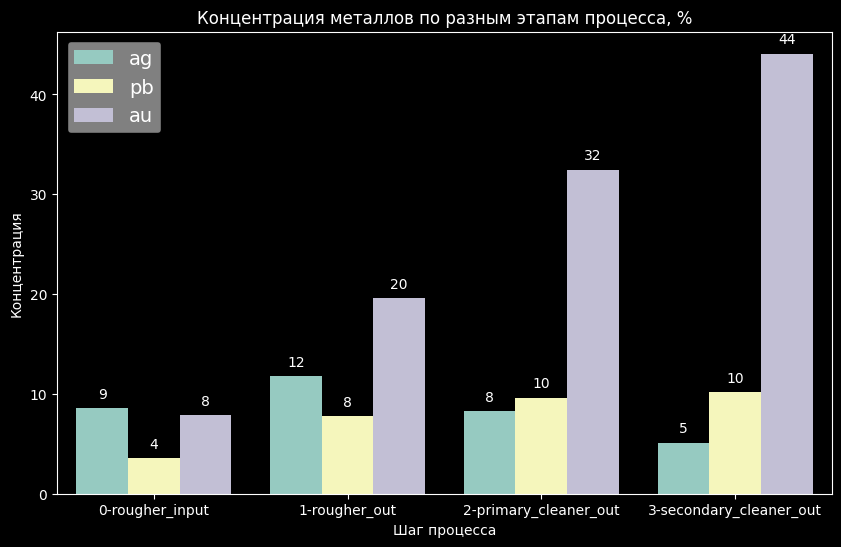

In [12]:
# получим данные по концентрации металлов в разных этапах процесса. На тренировочной выборке.
metals_concentration= []
for m in ['ag','pb','au']:
    metals_concentration.append([m, '0-rougher_input', data_train[f'rougher.input.feed_{m}'].mean()])   
    metals_concentration.append([m, '1-rougher_out', data_train[f'rougher.output.concentrate_{m}'].mean()])
    metals_concentration.append([m, '2-primary_cleaner_out', data_train[f'primary_cleaner.output.concentrate_{m}'].mean()])
    metals_concentration.append([m, '3-secondary_cleaner_out', data_train[f'final.output.concentrate_{m}'].mean()])

metals_concentration = pd.DataFrame(metals_concentration, columns=['Металл', 'Шаг процесса', 'Концентрация'])
 
# отобразим на графике    
mpl.style.use('dark_background') 
fig, ax = plt.subplots(figsize=(10, 6)) # утсановим размер графика
plot = sns.barplot(x="Шаг процесса", hue="Металл", y="Концентрация", data=metals_concentration)
plot.set_title('Концентрация металлов по разным этапам процесса, %')
plt.legend(loc='upper left', fontsize=14,  framealpha=1, facecolor='gray', edgecolor='black')

#for container in plot.containers:
#    plot.bar_label(container, fmt='%i') # значения столбцов  

# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+1, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center    
    
plt.show()

**Промежуточные выводы**

Из приложенного графика видно, что :
- целевой металл процесса - `золото (Au)` - планомерно прибавляет свою концентрацию от шага к шагу процесса, меняя значение от 7 до 44%. Каждый этап последовательно добавляет к концентрации по 12-13%

- побочный металл процесса - `серебро (Ag)` - на этапе флотации концентрация растет с 8 до 11%, затем за два этапа очистки падает до 5%.

- побочный металл процесса - `свинец (Pb)` - наращивает свою концентрацию от 3 до 10% 

---

### Размеры гранул сырья в разных выборках

2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

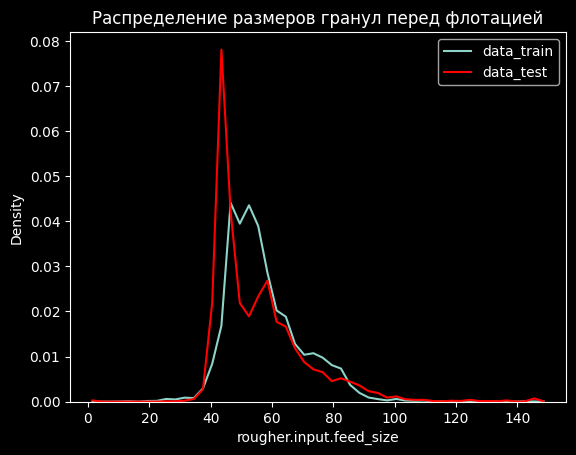

Параметры размеров гранул в data_train count   12679.00
mean       58.41
std        20.44
min         9.66
25%        48.72
50%        54.65
75%        63.72
max       484.97
Name: rougher.input.feed_size, dtype: float64

Параметры размеров гранул в data_test count   5229.00
mean      55.86
std       18.91
min        0.05
25%       43.91
50%       50.77
75%       62.27
max      392.49
Name: rougher.input.feed_size, dtype: float64


In [14]:
mpl.style.use('dark_background') 

ax = sns.histplot(
    data=data_train, x="rougher.input.feed_size", 
    bins=50, binrange=(0,150), 
    stat='density', common_norm=False, 
    element="poly", fill=False, legend=True)

ax = sns.histplot(
    data=data_test, x="rougher.input.feed_size", 
    color='red', bins=50, binrange=(0,150), 
    stat='density', common_norm=False, 
    element="poly", fill=False, legend=True )

ax.set_title('Распределение размеров гранул перед флотацией')
plt.legend(labels=["data_train","data_test"])
plt.show()

print('Параметры размеров гранул в data_train', data_train['rougher.input.feed_size'].describe())
print('\nПараметры размеров гранул в data_test', data_test['rougher.input.feed_size'].describe())

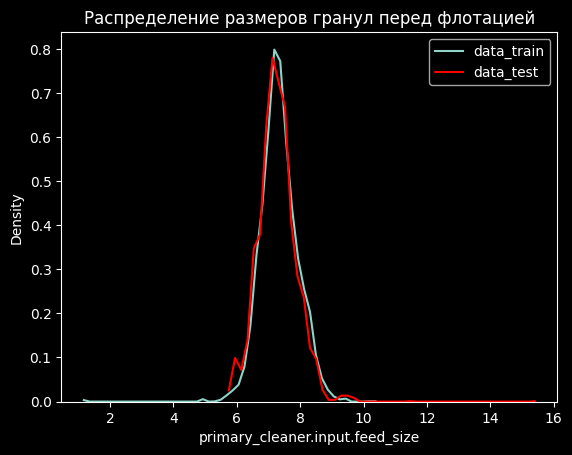

Параметры размеров гранул в data_train count   12679.00
mean       58.41
std        20.44
min         9.66
25%        48.72
50%        54.65
75%        63.72
max       484.97
Name: rougher.input.feed_size, dtype: float64

Параметры размеров гранул в data_test count   5229.00
mean      55.86
std       18.91
min        0.05
25%       43.91
50%       50.77
75%       62.27
max      392.49
Name: rougher.input.feed_size, dtype: float64


In [16]:
mpl.style.use('dark_background') 

ax = sns.histplot(
    data=data_train, x="primary_cleaner.input.feed_size", 
    bins=50, 
    stat='density', common_norm=False, 
    element="poly", fill=False, legend=True)

ax = sns.histplot(
    data=data_test, x="primary_cleaner.input.feed_size", 
    color='red', bins=50, 
    stat='density', common_norm=False, 
    element="poly", fill=False, legend=True )

ax.set_title('Распределение размеров гранул перед флотацией')
plt.legend(labels=["data_train","data_test"])
plt.show()

print('Параметры размеров гранул в data_train', data_train['rougher.input.feed_size'].describe())
print('\nПараметры размеров гранул в data_test', data_test['rougher.input.feed_size'].describe())

**Промежуточные выводы**

Согласно графикам распределения не сильно отличаются друг от друга по форме. Перед флотацией распределение напоминает нормальное, но с вылетами гранул бОлшего размера.
После флотации, перед первым этапом очистки размер гранул в целом уменьшается и распределение становится близким к нормальному. **Данные тестовой и обучающей выборки соответствуют друг другу и подходят для дальнейшего построения модели**.

---

### Суммарная концентрация веществ на разных этапах

In [17]:
# функция для отображения графика распределения суммарной концентрации
def total_concentration_chart():
    mpl.style.use('dark_background') 
    
    total_concentration= []
    # цикл по этапам процесса
    for step in ['rougher.input.feed_','rougher.output.concentrate_','primary_cleaner.output.concentrate_','final.output.concentrate_']:
        columns=[]
        #цикл по веществам
        for i in ['ag','pb','au','sol']:
            columns.append(step+i)
        # посчитаем полную концентрацию на текущем этапе процесса и построим график
        total_concentration =  data_train.apply(lambda row: row[columns].sum(),axis=1)
        total_concentration.plot(
            kind='hist', 
            bins=100, 
            linewidth=2,  
            alpha=0.9, 
            label = step, 
            histtype='step', 
            figsize=(10,6), 
            title='Суммарная концентрация веществ')
    
    plt.legend(loc='upper left', fontsize=14,  framealpha=1, facecolor='gray', edgecolor='black')
    plt.xlabel('Суммарная концентрация, %', fontsize=14)
    plt.ylabel('Частота наблюдений', fontsize=14)
    plt.show()

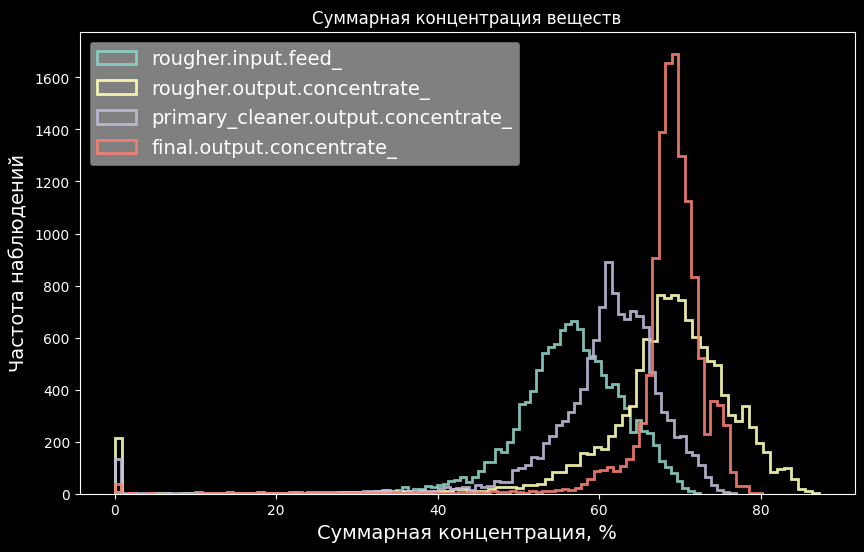

In [18]:
#график до изменений
total_concentration_chart()

Для разных этапов процесса заметно значительное количество нулевых либо околонулевых выбросов. Это неправдоподобно, потому удалим из обучающей и тестовой выборок строки с суммарной концентрацией меньше 1%. 
- Для data_train проверим все 4 этапа `rougher.input.feed_`,`rougher.output.concentrate_`,`primary_cleaner.output.concentrate_`,`final.output.concentrate_`
- Для data_test - только этап `rougher.input.feed_`, т.к. остальные поля отсутствуют в выборке

In [19]:
MIN_CONCENTRATION = 1
data_train = data_train.loc[
    data_train['rougher.input.feed_ag']+
    data_train['rougher.input.feed_pb']+
    data_train['rougher.input.feed_au']+
    data_train['rougher.input.feed_sol'] > MIN_CONCENTRATION]

data_train = data_train.loc[
    data_train['rougher.output.concentrate_ag']+
    data_train['rougher.output.concentrate_pb']+
    data_train['rougher.output.concentrate_au']+
    data_train['rougher.output.concentrate_sol'] > MIN_CONCENTRATION]

data_train = data_train.loc[
    data_train['primary_cleaner.output.concentrate_ag']+
    data_train['primary_cleaner.output.concentrate_pb']+
    data_train['primary_cleaner.output.concentrate_au']+
    data_train['primary_cleaner.output.concentrate_sol'] > MIN_CONCENTRATION]

data_train = data_train.loc[
    data_train['final.output.concentrate_ag']+
    data_train['final.output.concentrate_pb']+
    data_train['final.output.concentrate_au']+
    data_train['final.output.concentrate_sol'] > MIN_CONCENTRATION]

data_test = data_test.loc[
    data_test['rougher.input.feed_ag']+
    data_test['rougher.input.feed_pb']+
    data_test['rougher.input.feed_au']+
    data_test['rougher.input.feed_sol'] > MIN_CONCENTRATION]

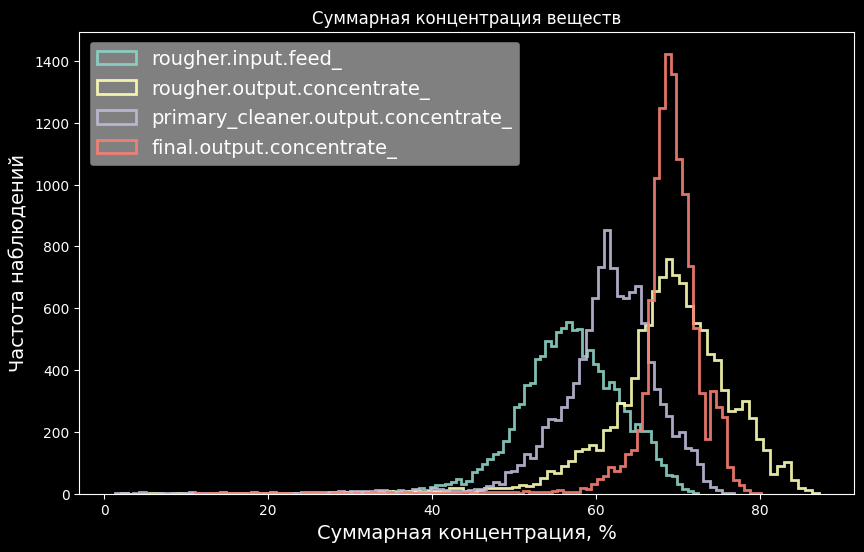

In [20]:
#график после изменений
total_concentration_chart()

**Промежуточные выводы**

В процессе проверки распределения суммарной концентрации веществ была выявлено большое количество аномалий с суммарной концентрацией менее 1%. Все такие данные были удалены из обучающей и тестовой выборок.

---

## Модель машинного обучения

### Функция sMAPE

In [21]:
def smape(real, predictions):
    real, predictions = np.array(real), np.array(predictions)
    return np.mean(
        np.abs(real - predictions) 
        / 
        ((np.abs(real) + np.abs(predictions))/2) 
        * 100
    )

---

### Обучение моделей и выбор лучшей

<a id='scaling'></a>

In [22]:
# проведем скалирование числовых признаков
numeric = train_common_columns
numeric = numeric.delete(0) # удаляем поле date

scaler = StandardScaler()
scaler.fit(data_train[numeric])
data_train[numeric] = scaler.transform(data_train[numeric])
data_test[numeric] = scaler.transform(data_test[numeric])

#### Модель для предсказания rougher.output.recovery

Для обучения будем использовать поля, доступные в тестовой выборке для процесса rougher - `rougher.input` и `rougher.state`

In [23]:
# оставим требуемые наименования колонок для обучения среди набора общих колонок для обучающей и тестовой выборки
rougher_columns = []
# пройдем по всем общим колонкам в обучающей и тестовой выборке
for col in train_common_columns:
    # оставим только требуемые для обучения модели колонки
    if col=='date' or 'rougher.input.' in col or 'rougher.state.' in col:
        rougher_columns.append(col)

print(rougher_columns)

['date', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']


In [24]:
# определяем признаки и целевой признак 
# data_train.set_index('date', inplace = True) # перенесем дату в индекс
rougher_features_train = data_train[rougher_columns]
rougher_target_train = data_train['rougher.output.recovery'] #целевой признак

rougher_features_train.set_index('date', inplace=True)

# отделим валидационную выборку от обучающей 
#features_train, features_valid, target_train, target_valid = train_test_split(
#   features, target, test_size=0.25, random_state=12345)

print('data_train.shape :', data_train.shape)
print('rougher_features_train.shape :', rougher_features_train.shape)
print('rougher_target_train.shape :', rougher_target_train.shape)

data_train.shape : (11939, 87)
rougher_features_train.shape : (11939, 22)
rougher_target_train.shape : (11939,)


<AxesSubplot:>

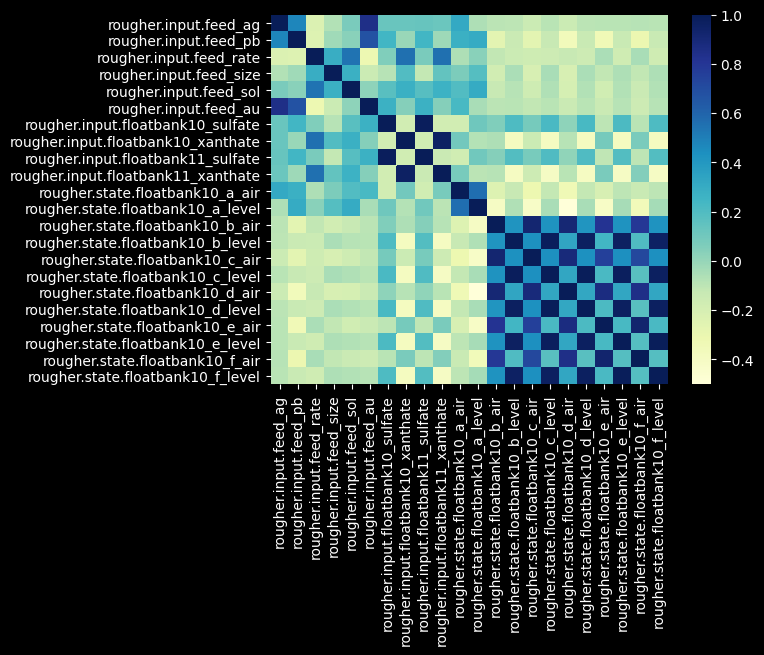

In [25]:
# проверим признаки на мультиколлинеарность
sns.heatmap(rougher_features_train.corr(), cmap="YlGnBu")

Видна высокая корреляция между параметрами группы `rougher.state.floatbank..`, причем параметры `...air` c разными буквенными индексами коррелируют друг с другом, также взаимно коррелируют параметры `...level`. Для уменьшения влияния мультиколлинеарности можно убрать все параметры из группы `rougher.state.floatbank..` с идексами `C-F`, т.к. они сильно коррелируют с параметрами `В`

In [26]:
multicollinear_columns = [
    'rougher.state.floatbank10_c_air', 
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_air',
    'rougher.state.floatbank10_f_level']
rougher_features_train.drop(multicollinear_columns, axis=1, inplace=True)

<AxesSubplot:>

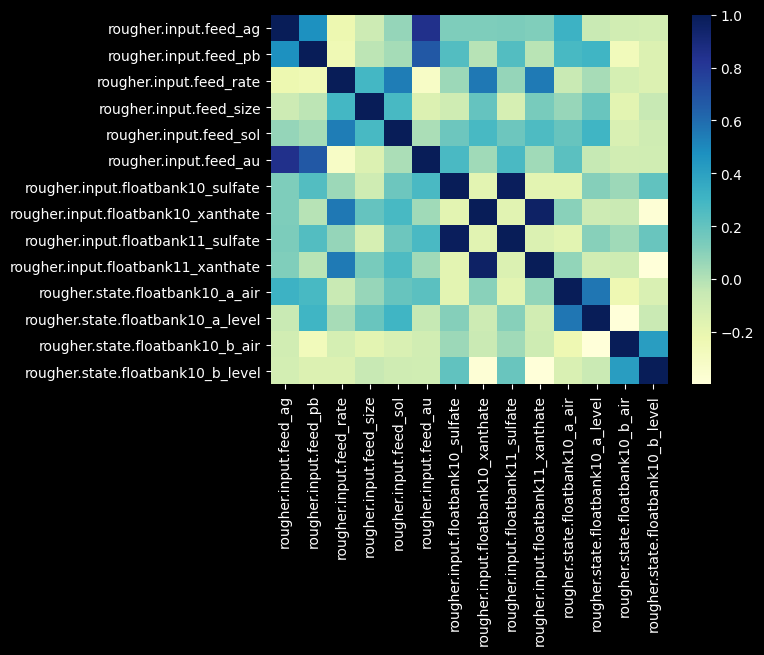

In [27]:
# проверим признаки на мультиколлинеарность
sns.heatmap(rougher_features_train.corr(), cmap="YlGnBu")

**LinearRegression**

In [28]:
# задаем модель  
model = LinearRegression() 
parametrs = { }

# запускаем GridSearchCV
grid_search = GridSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False), n_jobs=-1)
grid_search.fit(rougher_features_train, rougher_target_train)

# получаем лучшие результаты
print("sMAPE модели LinearRegression :", np.mean(-grid_search.best_score_))
best_model_lr=grid_search.best_estimator_

sMAPE модели LinearRegression : 5.843982526169269


[Перейти к ячейке Scaling](#scaling)

**DecisionTreeRegressor**

In [29]:
# задаем модель и параметры перебора
model = DecisionTreeRegressor(random_state=12345)
parametrs = { 'max_depth': range (1, 20) }

# запускаем GridSearchCV
grid_search = GridSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False), n_jobs=-1)
grid_search.fit(rougher_features_train, rougher_target_train)

# получаем лучшие результаты
print(grid_search.best_params_)
print('sMAPE модели DecisionTreeRegressor :',  -grid_search.best_score_)
best_model_dtr=grid_search.best_estimator_

{'max_depth': 5}
sMAPE модели DecisionTreeRegressor : 6.764787753596723


**RandomForestRegressor**

In [30]:
%%time
# задаем модель и параметры перебора
model = RandomForestRegressor(random_state=12345)
parametrs = {'n_estimators': range(100,400,100),
             'max_depth': range(5,26,10) }

# запускаем RandomizedSearchCV
grid_search = RandomizedSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False))
grid_search.fit(rougher_features_train, rougher_target_train)
best_params = grid_search.best_params_
print(best_params)

{'n_estimators': 200, 'max_depth': 5}
CPU times: user 10min 38s, sys: 1.9 s, total: 10min 40s
Wall time: 10min 40s


In [31]:
%%time
# запускаем GridSearchCV с диапазоном параметров вокург лучших параметров RandomizedSearchCV
parametrs = {'n_estimators': range(best_params["n_estimators"]-40,best_params["n_estimators"]+41,40),
             'max_depth': range(best_params["max_depth"]-5,best_params["max_depth"]+6,5) }

# запускаем GridSearchCV
grid_search = GridSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False))
grid_search.fit(rougher_features_train, rougher_target_train)

# получаем лучшие результаты
print(grid_search.best_params_)
print('sMAPE модели RandomForestRegressor :',  -grid_search.best_score_)
best_model_rfr=grid_search.best_estimator_

{'max_depth': 5, 'n_estimators': 160}
sMAPE модели RandomForestRegressor : 6.2631545771302175
CPU times: user 5min 1s, sys: 444 ms, total: 5min 2s
Wall time: 5min 2s


**Ridge**

In [32]:
# задаем модель  
model = Ridge(random_state=12345)
parametrs = { }

# запускаем GridSearchCV
grid_search = GridSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False), n_jobs=-1)
grid_search.fit(rougher_features_train, rougher_target_train)

# получаем лучшие результаты
print("sMAPE модели Ridge :", np.mean(-grid_search.best_score_))
best_model_rid=grid_search.best_estimator_

sMAPE модели Ridge : 5.846072974228579


In [33]:
best_model_rougher = best_model_lr

Лучшая модель - **LinearRegression**

---

#### Модель для предсказания final.output.recovery

Для обучения будем использовать поля, доступные в обучающей и тестовой выборке. Ранее мы сохранили их в переменной `train_common_columns`

In [34]:
# определяем признаки и целевой признак 
final_features_train = data_train[train_common_columns]
final_target_train = data_train['final.output.recovery'] #целевой признак

final_features_train.set_index('date', inplace=True)

# отделим валидационную выборку от обучающей 
#features_train, features_valid, target_train, target_valid = train_test_split(
#   features, target, test_size=0.25, random_state=12345)

print('data_train.shape :', data_train.shape)
print('final_features_train.shape :', final_features_train.shape)
print('final_target_train.shape :', final_target_train.shape)

data_train.shape : (11939, 87)
final_features_train.shape : (11939, 52)
final_target_train.shape : (11939,)


In [35]:
# удалим колонки для борьбы с мультиколлинеарностью
final_features_train.drop(multicollinear_columns, axis=1, inplace=True)

**LinearRegression**

In [36]:
# задаем модель  
model = LinearRegression() 
parametrs = { }

# запускаем GridSearchCV
grid_search = GridSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False), n_jobs=-1)
grid_search.fit(final_features_train, final_target_train)

# получаем лучшие результаты
print("sMAPE модели LinearRegression :", np.mean(-grid_search.best_score_))
best_model_lr=grid_search.best_estimator_

sMAPE модели LinearRegression : 10.061271081202872


**DecisionTreeRegressor**

In [37]:
# задаем модель и параметры перебора
model = DecisionTreeRegressor(random_state=12345)
parametrs = { 'max_depth': range (1, 20) }

# запускаем GridSearchCV
grid_search = GridSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False), n_jobs=-1)
grid_search.fit(final_features_train, final_target_train)

# получаем лучшие результаты
print(grid_search.best_params_)
print('sMAPE модели DecisionTreeRegressor :',  -grid_search.best_score_)
best_model_dtr=grid_search.best_estimator_

{'max_depth': 1}
sMAPE модели DecisionTreeRegressor : 8.348199474255463


**RandomForestRegressor**

In [38]:
%%time
# задаем модель и параметры перебора
model = RandomForestRegressor(random_state=12345)
parametrs = {'n_estimators': range(100,400,100),
             'max_depth': range(5,26,10) }

# запускаем RandomizedSearchCV
grid_search = RandomizedSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False), n_jobs=-1)
grid_search.fit(final_features_train, final_target_train)

best_params = grid_search.best_params_
print(best_params)

{'n_estimators': 100, 'max_depth': 5}
CPU times: user 34min 48s, sys: 2.58 s, total: 34min 51s
Wall time: 34min 52s


In [39]:
%%time
# запускаем GridSearchCV с диапазоном параметров вокург лучших параметров RandomizedSearchCV
parametrs = {'n_estimators': range(best_params["n_estimators"]-40,best_params["n_estimators"]+41,40),
             'max_depth': range(best_params["max_depth"]-5,best_params["max_depth"]+6,5) }

# запускаем GridSearchCV
grid_search = GridSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False), n_jobs=-1)
grid_search.fit(final_features_train, final_target_train)

# получаем лучшие результаты
print(grid_search.best_params_)
print('sMAPE модели RandomForestRegressor :',  -grid_search.best_score_)
best_model_rfr=grid_search.best_estimator_

{'max_depth': 5, 'n_estimators': 100}
sMAPE модели RandomForestRegressor : 8.223776419700783
CPU times: user 7min 45s, sys: 636 ms, total: 7min 46s
Wall time: 7min 46s


**Ridge**

In [40]:
# задаем модель  
model = Ridge(random_state=12345)
parametrs = { }

# запускаем GridSearchCV
grid_search = GridSearchCV(model, parametrs, cv=5, 
                           scoring = make_scorer(smape, greater_is_better=False), n_jobs=-1)
grid_search.fit(final_features_train, final_target_train)

# получаем лучшие результаты
print("sMAPE модели Ridge :", np.mean(-grid_search.best_score_))
best_model_rid=grid_search.best_estimator_

sMAPE модели Ridge : 10.058288822649805


In [41]:
best_model_final = best_model_dtr

Лучшая модель для предсказания final.output.recover : **DecisionTreeRegressor**
___

#### Проверка лучших моделей на тестовой выборке

**Подготовка тестовой выборки**

Для проверки лучшей модели для процесса флотации 
- набор признаков : с урезанным количеством столбцов data_test - только `rougher.input.` и `rougher.state.` Список столбцов ранее сохраняли в переменной rougher_columns
- целевой признак : подтянем из таблицы data_full колонку `rougher.output.recovery` по индексу (date)

Для проверки лучшей модели для финального результата
- набор признаков : с полным количеством столбцов data_test
- целевой признак : подтянем из таблицы data_full колонку `final.output.recovery` по индексу (date)


In [42]:
features_test_rougher = data_test[rougher_columns]
features_test_rougher.set_index('date', inplace=True)
features_test_rougher.drop(multicollinear_columns, axis=1, inplace=True)

features_test_final = data_test.loc[:] 
features_test_final.set_index('date', inplace=True)
features_test_final.drop(multicollinear_columns, axis=1, inplace=True)

target_test_rougher = data_full['rougher.output.recovery'].loc[features_test_rougher.index]
target_test_final = data_full['final.output.recovery'].loc[features_test_final.index]

In [43]:
print('features_test_rougher.shape', features_test_rougher.shape)
print('target_test_rougher.shape', target_test_rougher.shape)

print('features_test_final.shape', features_test_final.shape)
print('target_test_final.shape', target_test_final.shape)

features_test_rougher.shape (5229, 14)
target_test_rougher.shape (5229,)
features_test_final.shape (5229, 44)
target_test_final.shape (5229,)


**Оценка sMAPE лучших моделей на тестовой выборке**

In [44]:
predictions_rougher = best_model_rougher.predict(features_test_rougher)
smape_rougher = smape(target_test_rougher, predictions_rougher)
print('Процесс флотации - sMAPE лучшей модели :', smape_rougher)

Процесс флотации - sMAPE лучшей модели : 8.168772770892296


In [45]:
predictions_final= best_model_final.predict(features_test_final)
smape_final = smape(target_test_final, predictions_final)
print('Процесс вторичной очистки - sMAPE лучшей модели :', smape_final)

Процесс вторичной очистки - sMAPE лучшей модели : 8.944039218397588


**Итоговое sMAPE**

$Итоговое\ sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)$ 

In [46]:
print('Итоговое sMAPE =', 0.25 * smape_rougher + 0.75 * smape_final)

Итоговое sMAPE = 8.750222606521266


**Промежуточный вывод**

При работе двух лучших моделей получился итоговый sMAPE = 8.75
___

**Проверка на вменяемость**

In [47]:
# создадим DummyRegressor для оценки поведения алгоритма, всегда предсказывающего среднее значение
# процесс Rougher
rougher_model_dummy = DummyRegressor(strategy="mean")
rougher_model_dummy.fit(rougher_features_train, rougher_target_train)
predictions_rougher = rougher_model_dummy.predict(features_test_rougher)
smape_rougher = smape(target_test_rougher, predictions_rougher)

# процесс Final
final_model_dummy = DummyRegressor(strategy="mean")
final_model_dummy.fit(final_features_train, final_target_train)
predictions_final = final_model_dummy.predict(features_test_final)
smape_final = smape(target_test_final, predictions_final)
 
print('Итоговое sMAPE  Dummy модели =', 0.25 * smape_rougher + 0.75 * smape_final)

Итоговое sMAPE  Dummy модели = 9.229512718776839


Результаты дамми модели со средними значениями получился несколько хуже, чем у обученных моделей. 9.23 против 8.75

## Общий вывод

**Импорт и предобработка данных**

- даные импортированы без проблем
- наименования полей понятны, формат наименований соответствует стандартам
- перепроверен расчет Recovery для процесса флотации - результат вычислений совпадает с табличными данными, что подтверждает корректность данных и возможность построения работающей модели
- в диапазоне data_test присутствует меньшее кол-во колонок. На эти колонки будем ориентироваться в дальнейшей работе модели, потому убрали пропуски. В обучающей выборки удалили 14149 - 12679 = 1470 строк (10.4%) В тестовой выборки удалили 5290 - 5229 = 61 строку (1.1%)

**Анализ данных**

- целевой металл процесса - `золото (Au)` - планомерно прибавляет свою концентрацию от шага к шагу процесса, меняя значение от 7 до 44%. Каждый этап последовательно добавляет к концентрации по 12-13%
- побочный металл процесса - `серебро (Ag)` - на этапе флотации концентрация растет с 8 до 11%, затем за два этапа очистки падает до 5%.
- побочный металл процесса - `свинец (Pb)` - наращивает свою концентрацию от 3 до 10% 
- Анализ размера гранул сырья в тестовой и обучающей выборке показывает соответствие выборок друг другу. Выборки подходят для дальнейшего построения модели.
- В процессе проверки распределения суммарной концентрации веществ была выявлено большое количество аномалий с суммарной концентрацией менее 1%. Все такие данные были удалены из обучающей и тестовой выборок.

**Обучение моделей и выбор лучшей**
- для процесса флотации и итоговой очистки независимо друг от друга был протестирован ряд моделей : линейная регрессия, решающее дерево, случайный лес и Ridge
- лучшие гиперпараметры каждой из моделей выбирались в процессе кросс-валидации
- для оценки качества модели использовалась метрика sMAPE (чем меньше - тем лучше)
- лучшей моделью для процесса флотации оказалась модель **линейной регрессии**
- лучшей моделью для процесса финальной очистки оказалась модель **решающее дерево**
- на тестовой выборке каждая из моделей была оценена метрикой sMAPE 
- была посчитана метрика **Итоговое sMAPE = 8.75**